This is just a made-up data set inspired by a [Nature Methods article](https://www.nature.com/articles/nmeth.2807)

In [1]:
import pandas as pd
import altair as alt

In [2]:
df_orig = pd.read_csv('data/NatureBarValues.csv')
df_orig.head()

,Item,Category 1,Category 2,Category 3,Category 4,Category 5
0,Item 1,6,29,18,30,7
1,Item 2,8,27,17,13,11
2,Item 3,10,21,16,4,19
3,Item 4,20,17,16,9,7
4,Item 5,23,5,15,19,2


#### Make data "tidy"

In [3]:
df = df_orig.melt(id_vars=["Item"],var_name="Category")
df.head(10)

,Item,Category,value
0,Item 1,Category 1,6
1,Item 2,Category 1,8
2,Item 3,Category 1,10
3,Item 4,Category 1,20
4,Item 5,Category 1,23
5,Item 1,Category 2,29
6,Item 2,Category 2,27
7,Item 3,Category 2,21
8,Item 4,Category 2,17
9,Item 5,Category 2,5


In [4]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

### Faceted bars

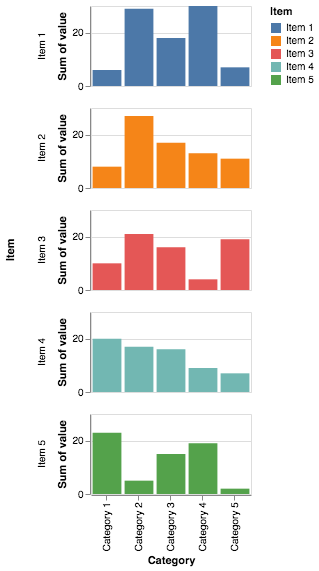

In [7]:
alt.Chart(df).mark_bar().encode(
    x = 'Category:O',
    y = 'sum(value):Q',
    color = 'Item:N'
).properties(
    width = 160,
    height = 80
).facet(
    row='Item:O'
)

### Symmetric (centered) floating bars

With very few annotations so they look more stylized. Use y and y2 to set the bounds of the rectangle mark.

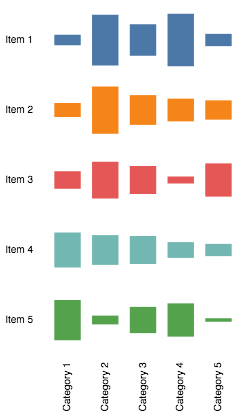

In [9]:
balanced_rects = alt.Chart(df).mark_rect().encode(
    x = alt.X('Category:N', 
              scale=alt.Scale(padding=0.3),
              title=None,
              axis=alt.Axis(domainWidth=0, tickWidth=0)
             ),
    y = alt.Y('posy:Q', title=None, axis=None),
    y2 = 'negy:Q',
    color = alt.Color('Item:N', legend=None),
    row=alt.Row('Item:N',
                title=None,
                header=alt.Header(
                    labelAngle=0,
                    labelOrient='left',
                    labelAlign='right',
                    labelPadding=10,
                    ),
                ),
).transform_calculate(
    posy = '0.5*datum.value',
    negy = '-0.5*datum.value'
).properties(
    width = 200,
    height = 70
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)

balanced_rects